<Figure size 640x480 with 0 Axes>

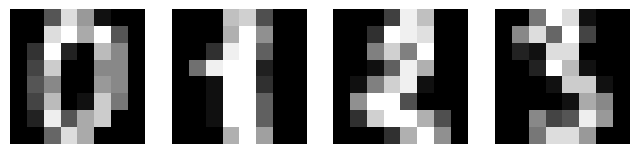

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
fig, axes = plt.subplots(1, 4, figsize=(8, 8))  # Adjust 8, 8 as needed for the full figure size

# Loop through the axes and display each image
for i, ax in enumerate(axes):
    ax.matshow(digits.images[i])
    ax.axis('off')

In [3]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
df['target']=digits.target
from sklearn.model_selection import train_test_split
xa,xb,ya,yb=train_test_split(df.drop(['target'], axis='columns'), digits.target, test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xa,ya)


# RandomForestClassifier(n_estimators=100, *, 
#                        criterion='gini', max_depth=None, min_samples_split=2, 
#                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                        max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                        bootstrap=True, oob_score=False, n_jobs=None, random_state=None, 
#                        verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, 
#                        max_samples=None, monotonic_cst=None)

RandomForestClassifier()

In [13]:
model.score(xb,yb)

0.9722222222222222

In [17]:
yp = model.predict(xb)
yp

array([6, 0, 2, 8, 3, 4, 9, 7, 3, 9, 5, 1, 7, 4, 5, 3, 5, 6, 1, 2, 8, 6,
       9, 3, 2, 7, 0, 4, 4, 1, 5, 6, 5, 5, 8, 4, 5, 2, 8, 6, 4, 4, 7, 7,
       7, 4, 9, 8, 9, 1, 0, 6, 2, 1, 8, 7, 4, 0, 2, 1, 4, 7, 0, 6, 6, 1,
       5, 5, 3, 7, 7, 8, 0, 4, 1, 0, 1, 0, 9, 0, 9, 5, 3, 6, 0, 5, 3, 7,
       2, 3, 6, 4, 0, 5, 2, 8, 2, 6, 6, 4, 1, 8, 5, 6, 9, 0, 6, 1, 3, 6,
       3, 7, 8, 2, 4, 4, 8, 4, 3, 5, 1, 3, 2, 4, 1, 0, 6, 0, 3, 1, 7, 9,
       7, 7, 1, 3, 2, 7, 7, 0, 8, 7, 9, 8, 9, 4, 5, 9, 3, 7, 1, 8, 1, 5,
       4, 8, 9, 7, 0, 5, 8, 2, 5, 6, 6, 2, 5, 8, 6, 6, 0, 4, 5, 5, 1, 7,
       7, 9, 1, 3, 9, 5, 0, 4, 8, 3, 1, 2, 9, 3, 5, 9, 2, 5, 7, 7, 3, 1,
       5, 2, 2, 1, 2, 8, 4, 6, 1, 7, 5, 5, 4, 9, 6, 4, 2, 4, 2, 2, 1, 1,
       8, 6, 9, 7, 1, 9, 4, 1, 5, 5, 0, 4, 1, 2, 2, 5, 7, 6, 0, 7, 3, 6,
       0, 7, 6, 0, 3, 7, 2, 4, 3, 4, 9, 9, 4, 6, 6, 8, 9, 9, 6, 3, 8, 7,
       4, 8, 3, 0, 7, 1, 6, 3, 7, 7, 1, 3, 7, 2, 5, 4, 8, 8, 7, 5, 2, 2,
       8, 5, 3, 6, 0, 0, 4, 9, 7, 0, 7, 1, 9, 3, 2,

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yb, yp)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 36,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 29]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

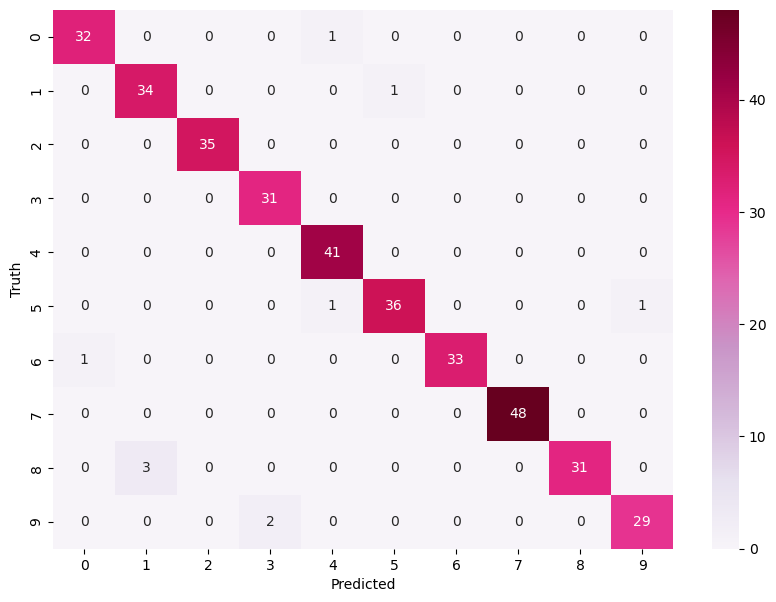

In [23]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, cmap="PuRd")
plt.xlabel("Predicted")
plt.ylabel("Truth")